In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
import math

a = 1000.05624604543e-3
b = 10.6068254211646e-3

f1 = 0.0e-3
f2 = f1 + 2.0 * math.sqrt(a * a + b * b)

# parabola part
p = 0.0562460454334836e-3

# whole mirror
WD = 1902.50110774383e-3
ML = 200.0e-3

param1 = 1.0 / (a * a)
param2 = -(f1 + f2) / (a * a) + 4.0 * p / (b * b)
param3 = math.pow(f1 + f2, 2) / (4.0 * a * a) - 4.0 * p * (p + f2) / (b * b) - 1.0
seam = (-param2 - math.sqrt(param2**2 - 4.0 * param1 * param3)) / (2.0 * param1)

def parabola(z):
    return math.sqrt(-4.0 * p * (z - p - f2))
def hyperbola(z):
    return b * math.sqrt((z - (f1 + f2) / 2)**2 / a**2 - 1.0)

entrance_radius = parabola(f1 - WD - ML)
seam_radius = parabola(seam)
exit_radius = hyperbola(f1 - WD)
ring_radius = seam_radius * WD / (f1 - seam)

In [95]:
# 1秒角分解能とは
# 上流端の光軸点から焦点面で見込む角度の分解能が1秒

resolution_deg = 1.0 / 3600
resolution_rad = resolution_deg / 180 * math.pi

required_beam_radius = (ML + WD) * math.tan(resolution_rad)

print(required_beam_radius)

print(math.atan2(38.2e-9, ML + WD) / math.pi * 180 * 3600)

1.0193213015901495e-05
0.0037475916514946726


In [75]:
# 可視光

N = 4096

wavelength = 632.8e-9
exit_length = 32 * exit_radius
detector_length = N * WD * wavelength / exit_length

x = np.linspace(-0.5 * exit_length, 0.5 * exit_length, N)
y = x.copy()
x, y = np.meshgrid(x, y)

ring = np.zeros((N, N))

r = np.hypot(x, y)
ring[(ring_radius <= r) & (r <= exit_radius)] = 1.0

focus = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ring)))

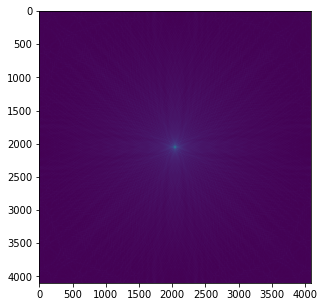

In [76]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(np.abs(focus))

In [77]:
focus_profile = np.abs(focus[:, N//2])

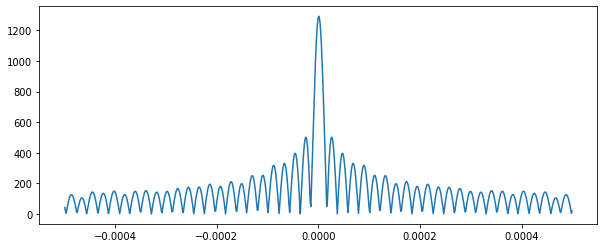

In [78]:
x = np.linspace(-0.5 * detector_length, 0.5 * detector_length, N)

window = (-500e-6 < x) & (x < 500e-6)
fig = plt.figure(figsize=(10, 4))
plt.plot(x[window], focus_profile[window])
fig.savefig('resource/chap2/ideal/focus_profile_visible.png')

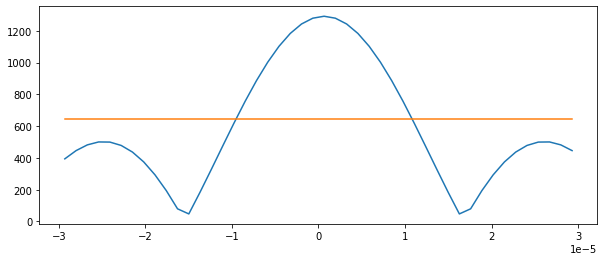

In [79]:
focus_max = np.max(focus_profile)

window = (-30e-6 < x) & (x < 30e-6)
plt.figure(figsize=(10, 4))
plt.plot(x[window], focus_profile[window], x[window], 0.5 * focus_max * np.ones(N)[window])

In [73]:
diff = focus_profile - 0.5 * focus_max

mink = np.argmin(np.abs(diff))
fwhm = 2.0 * abs(x[mink])
print(fwhm)

1.953115522951472e-05


In [90]:
x = np.linspace(-0.5 * detector_length, 0.5 * detector_length, N)
y = x.copy()
x, y = np.meshgrid(x, y)
r = np.hypot(x, y)

whole_sum = np.sum(np.abs(focus))

hpd = 0.5 * detector_length
step = hpd
while True:
    ratio = np.sum(np.abs(focus[r <= hpd])) / whole_sum
    print('hpd: ', hpd, 'ratio: ', ratio)
    if abs(ratio - 0.5) < 1.0e-3:
        break
    step /= 2
    if ratio > 0.5:
        hpd -= step
    else:
        hpd += step

hpd

hpd:  0.0026660026888287456 ratio:  0.9131706825431279
hpd:  0.0013330013444143728 ratio:  0.4427415480748619
hpd:  0.0019995020166215594 ratio:  0.7100092824326064
hpd:  0.0016662516805179663 ratio:  0.5817839029647125
hpd:  0.0014996265124661698 ratio:  0.5131745640137548
hpd:  0.0014163139284402715 ratio:  0.47805542881767676
hpd:  0.0014579702204532206 ratio:  0.4957122016459791
hpd:  0.0014787983664596952 ratio:  0.5044839158240492
hpd:  0.0014683842934564578 ratio:  0.49847862921328745
hpd:  0.0014735913299580765 ratio:  0.501531971424539
hpd:  0.0014709878117072671 ratio:  0.4998998023050051


0.0014709878117072671

In [96]:
N = 4096

energy = 0.3 # KeV
wavelength = 1.24 / energy * 1.0e-9
exit_length = 32 * exit_radius
detector_length = N * WD * wavelength / exit_length

x = np.linspace(-0.5 * exit_length, 0.5 * exit_length, N)
y = x.copy()
x, y = np.meshgrid(x, y)

ring = np.zeros((N, N))

r = np.hypot(x, y)
ring[(ring_radius <= r) & (r <= exit_radius)] = 1.0

focus = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ring)))

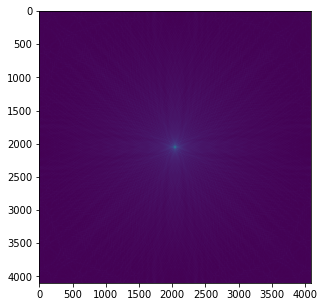

In [97]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(np.abs(focus))

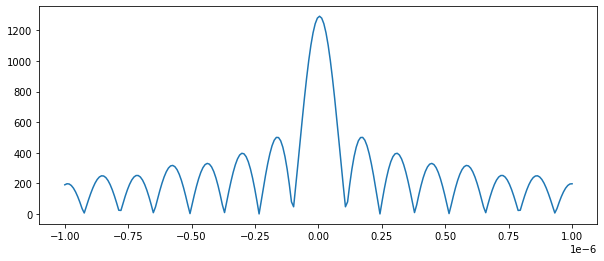

In [98]:
x = np.linspace(-0.5 * detector_length, 0.5 * detector_length, N)

window = (-1e-6 < x) & (x < 1e-6)
fig = plt.figure(figsize=(10, 4))
plt.plot(x[window], focus_profile[window])
fig.savefig('resource/chap2/ideal/focus_profile_1kev.png')

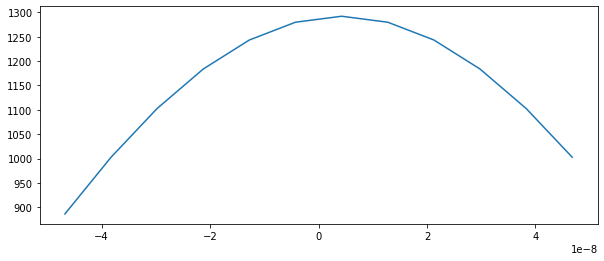

In [99]:
window = (-50e-9 < x) & (x < 50e-9)
plt.figure(figsize=(10, 4))
plt.plot(x[window], focus_profile[window])

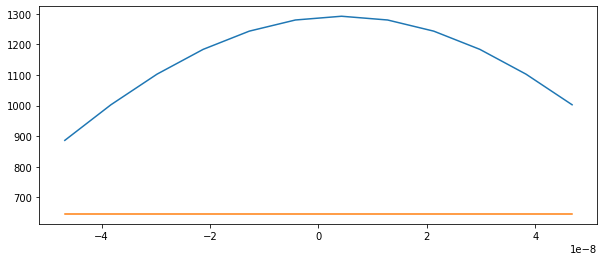

In [100]:
focus_max = np.max(focus_profile)

fig = plt.figure(figsize=(10, 4))
plt.plot(x[window], focus_profile[window], x[window], 0.5 * focus_max * np.ones(N)[window])

In [101]:
diff = focus_profile - 0.5 * focus_max

mink = np.argmin(np.abs(diff))
fwhm = 2.0 * abs(x[mink])
print(fwhm)

1.275739174283526e-07
